# Clustering dengan DBSCAN & BIRCH
Pada tugas ini, kita akan menggunakan **Give Me Some Credit**. Dataset dapat diakses melalui link berikut:\
🔗 https://www.kaggle.com/competitions/GiveMeSomeCredit/data?select=cs-training.csv

Tujuan utama dari tugas ini adalah melakukan **unsupervised learning (clustering)** menggunakan dua metode:
- **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**
- **BIRCH (Balanced Iterative Reducing and Clustering using Hierarchies)**

Langkah-langkah yang akan dilakukan adalah sebagai berikut:
1. Persiapan Dataset & Eksplorasi Awal
2. Preprocessing Data
3. Clustering dengan DBSCAN
4. Clustering dengan BIRCH
5. Visualisasi Hasil Clustering
6. Analisis & Kesimpulan

# 1. Import Library

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import DBSCAN, Birch
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import silhouette_score

# 2. Load Dataset

In [23]:
df = pd.read_csv('cs-training.csv')

# 3. Eksplorasi Awal

In [24]:
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [26]:
df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [27]:
df.isnull().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

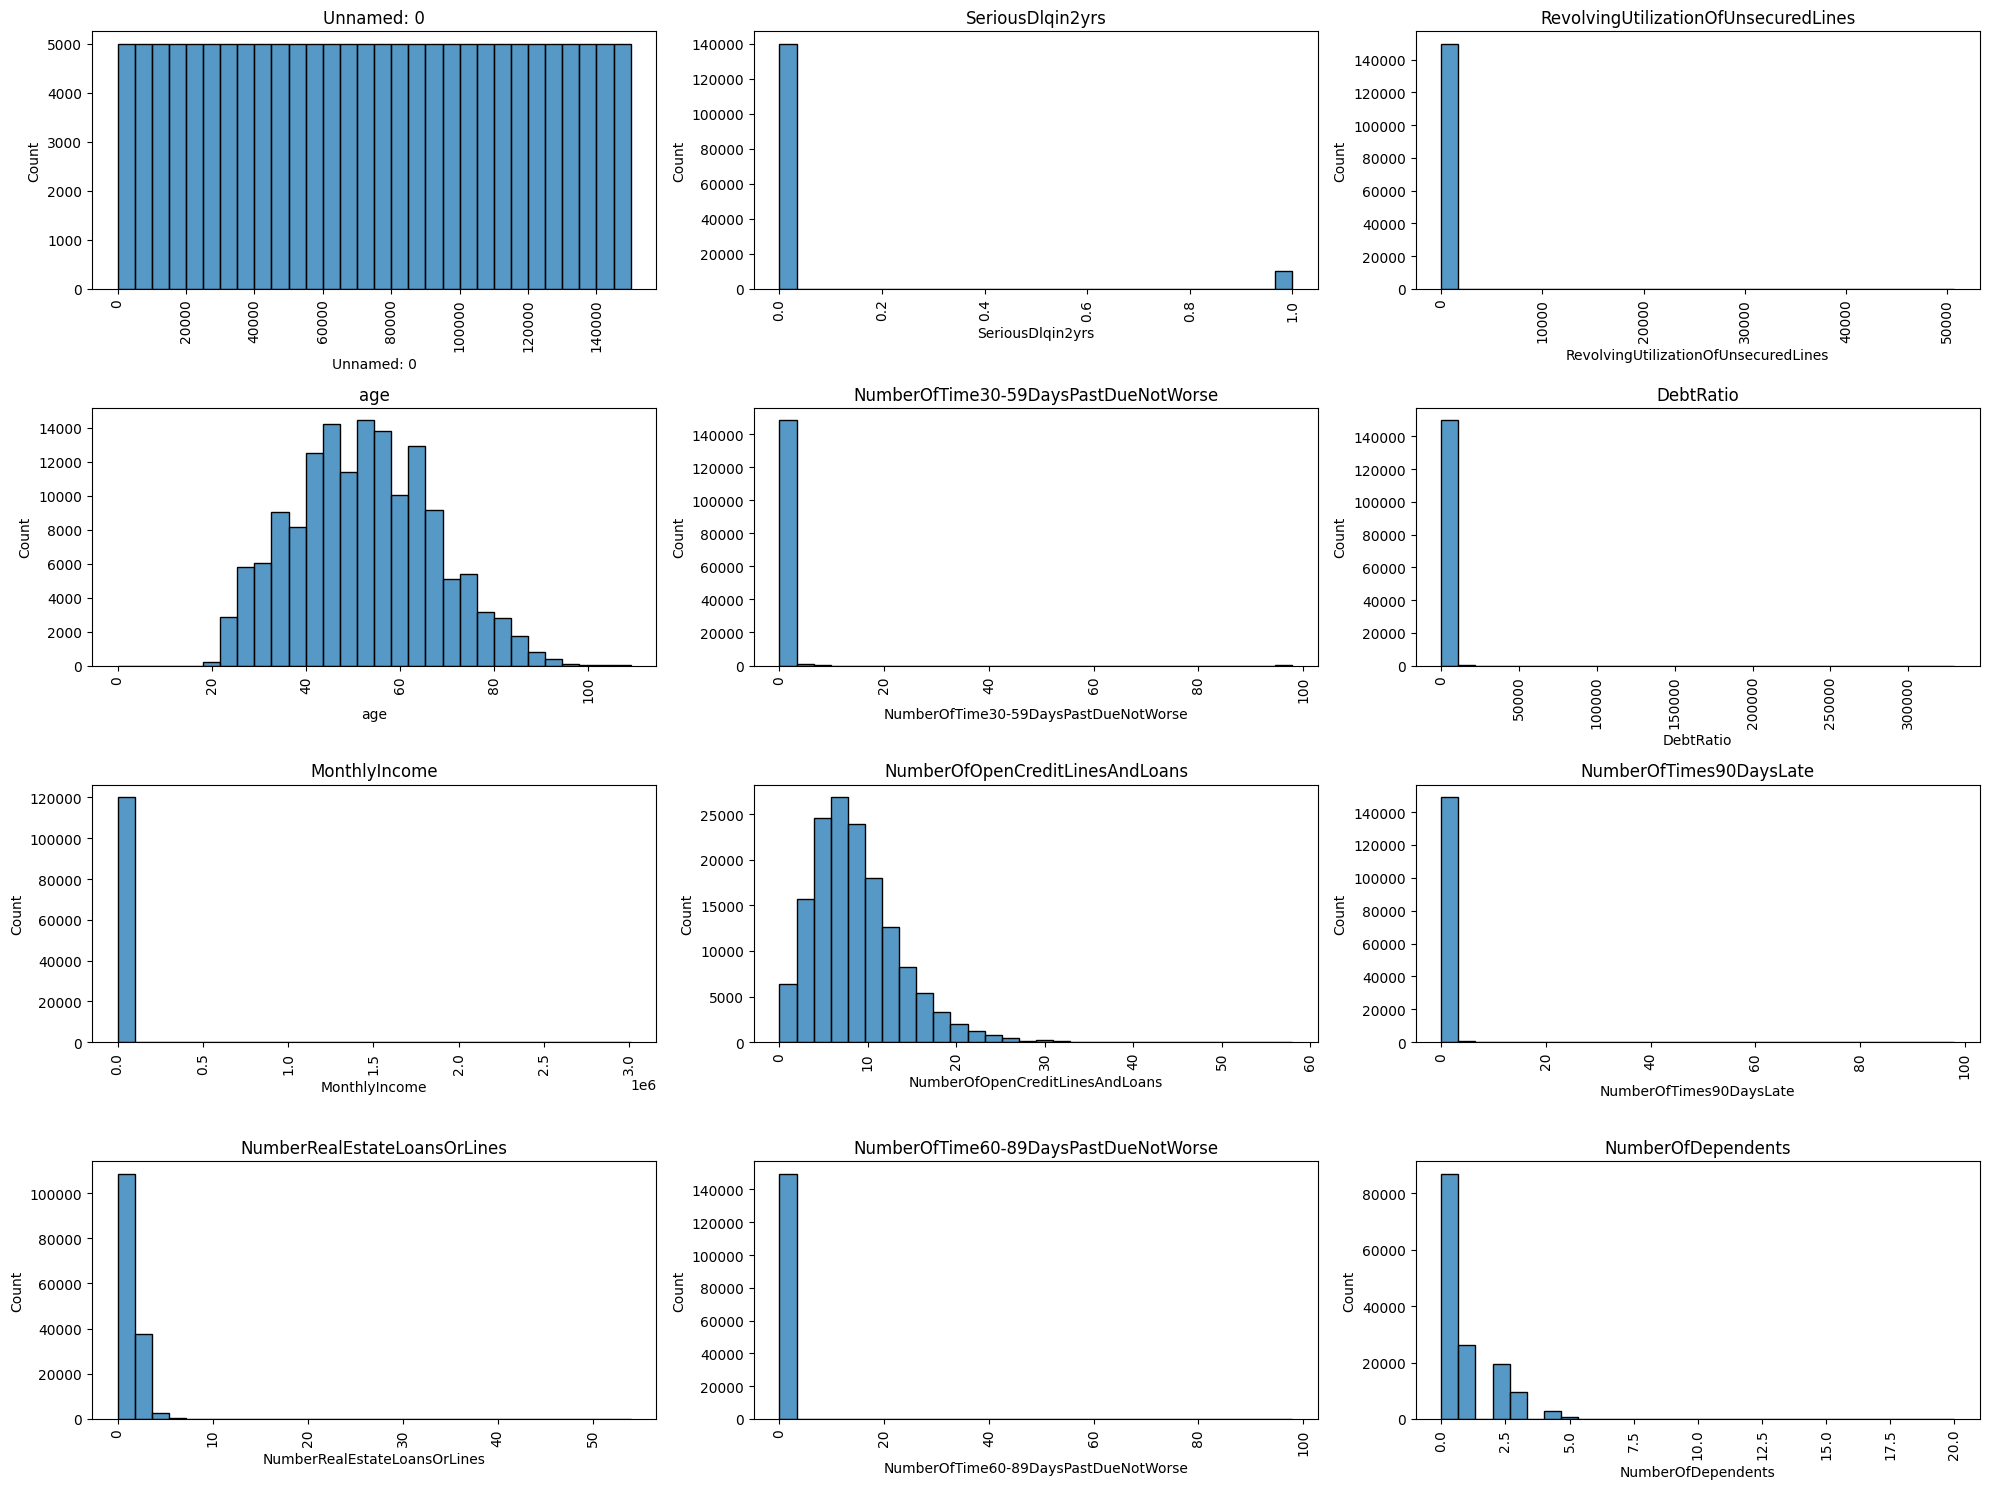

In [28]:
kolom_numerik = df.select_dtypes(np.number).columns
fig, axes = plt.subplots(4, 3, figsize=(20,15))
axes = axes.flatten()

for i, col in enumerate(kolom_numerik):
    sns.histplot(df[col], ax=axes[i], bins=30)
    axes[i].tick_params(axis='x', rotation=90)  # miring per subplot
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

# 4. Preprocessing Data

In [29]:
df = df.dropna()
X = df.head(55000)

In [30]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X)

In [31]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

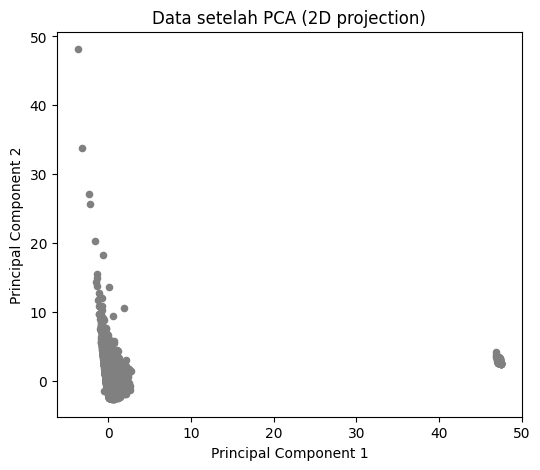

In [32]:
# Scatter data mentah (PCA)
plt.figure(figsize=(6,5))
plt.scatter(df_pca[:, 0], df_pca[:, 1], s=20, c='gray')
plt.title("Data setelah PCA (2D projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# 5. DBSCAN Clustering

In [33]:
db = DBSCAN(eps=0.7, min_samples=10)
label_dbscan = db.fit_predict(df_pca)

# 6. BIRCH Clustering

In [34]:
birch = Birch(n_clusters=None, threshold=2, branching_factor=50)
label_birch = birch.fit_predict(df_pca)

# 7. Visualisasi Hasil Clustering

## `DBSCAN`


Jumlah cluster: 2
Jumlah noise: 23
Silhouette Coefficient: 0.91


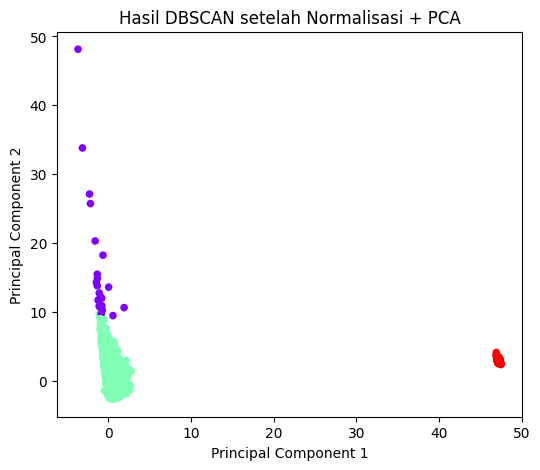

In [35]:
n_clusters = len(set(label_dbscan)) - (1 if -1 in label_dbscan else 0)
n_noise = list(label_dbscan).count(-1)

print("\nJumlah cluster:", n_clusters)
print("Jumlah noise:", n_noise)
if n_clusters > 1:
    sc = metrics.silhouette_score(df_pca, label_dbscan)
    print("Silhouette Coefficient: %0.2f" % sc)
else:
    print("Silhouette Coefficient tidak dapat dihitung (cluster terlalu sedikit).")

# --- Visualisasi hasil DBSCAN ---
plt.figure(figsize=(6,5))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=label_dbscan, cmap='rainbow', s=20)
plt.title("Hasil DBSCAN setelah Normalisasi + PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

## `BIRCH`


Jumlah cluster: 3
Jumlah noise: 0
Silhouette Coefficient: 0.52


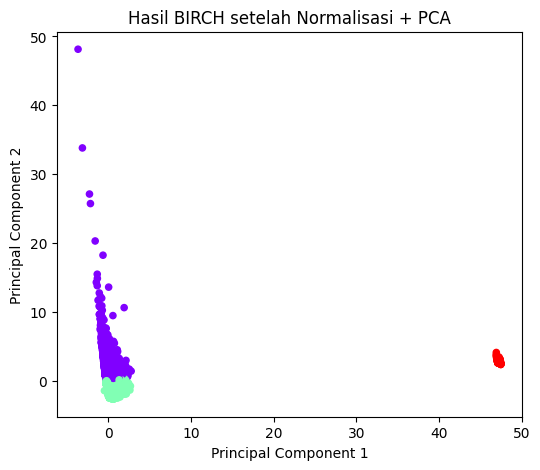

In [36]:
n_clusters = len(set(label_birch))
n_noise = list(label_birch).count(-1)

print("\nJumlah cluster:", n_clusters)
print("Jumlah noise:", n_noise)

if n_clusters > 1:
    sc = metrics.silhouette_score(df_pca, label_birch)
    print("Silhouette Coefficient: %0.2f" % sc)
else:
    print("Silhouette Coefficient tidak dapat dihitung (cluster terlalu sedikit).")

# --- Visualisasi hasil BIRCH ---
plt.figure(figsize=(6,5))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=label_birch, cmap='rainbow', s=20)
plt.title("Hasil BIRCH setelah Normalisasi + PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# 8. Analisis & Kesimpulan